In [3]:
import numpy as np
from scipy import signal, sparse
import skimage as sk
import skimage.filters as sf
import skimage.io as skio
from skimage.io import imsave, imshow, show
from skimage.color import grey2rgb
import matplotlib.pyplot as plt

from operations import *
from utils import *
from gradFusion import *

from pathlib import Path
PhotoPath = Path("images")

Lossy conversion from float64 to uint8. Range [-5.079092233964411e-05, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


File saved to: output/20191218001832_app_orange_5_10.jpg


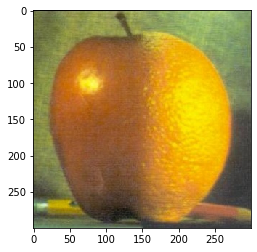

In [2]:
## 苹果橘子融合
imA = readImageNName(PhotoPath/"apple.jpeg")[0]
imO = readImageNName(PhotoPath/"orange.jpeg")[0]
imAOMask = readImageNName(PhotoPath/"mask2.jpg")[0]
result = multiResBlendOp(imA, imO, imAOMask, 5, 10)
#plt.imshow(result)
testImage("app_orange_5_10.jpg", result)
# gaussian
# for i in range(len(lst)):
#     testImage("monalisa_laplacian_pyr_" + str(i) + ".jpg", scaler(lst[i]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


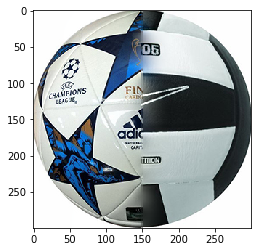

In [34]:
## 足球橄榄球融合
imS = readImageNName(PhotoPath/"soccer.jpg")[0]
imV = readImageNName(PhotoPath/"volleyball.jpg")[0]
imSVMask = readImageNName(PhotoPath/"mask2.jpg")[0]
SIGAMA1 = 5
SIGAMA2 = 10
resultSV = multiResBlendOp(imS, imV, imSVMask, SIGAMA1, SIGAMA2)
plt.imshow(resultSV)

In [36]:
print(imS.shape,imV.shape,imSVMask.shape)
# PATH = "volleyball_soccer_" + str(SIGAMA1) + "_" + str(SIGAMA2) + ".jpg"
# testImage(PATH, resultSV)
# gaussian
# for i in range(len(lst)):
#     testImage("monalisa_laplacian_pyr_" + str(i) + ".jpg", scaler(lst[i]))

(300, 300, 3) (300, 300, 3) (300, 300, 3)


In [ ]:
## 火星和冥王星融合
imM = readImageNName(PhotoPath/"mars.jpg")[0]
imP = readImageNName(PhotoPath/"pluto.jpg")[0]
imMPMask = readImageNName(PhotoPath/"mask2.jpg")[0]

(990, 1000, 3) (990, 1000, 3)


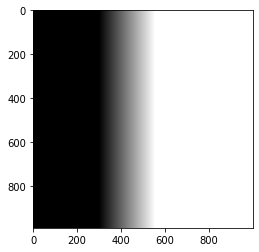

In [48]:
#imP.shape = imM.shape =  (990, 1000, 3)
mask = np.zeros(imM.shape[0:2], dtype="uint8")
for i in range(255):
    mask[:,i+300] = i
    #mask[100+i,:] = 255
mask[:,i+301:1000] = 255
mask = np.dstack([mask,mask,mask])/255
print(mask.shape,imM.shape)
plt.imshow(mask,'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


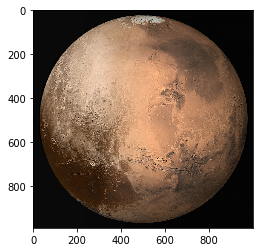

In [49]:
imMPMask = readImageNName(PhotoPath/"mask2.jpg")[0]
imMPMask = mask
SIGAMA1 = 5
SIGAMA2 = 10
resultMP = multiResBlendOp(imM, imP, imMPMask, SIGAMA1, SIGAMA2)
plt.imshow(resultMP)

Lossy conversion from float64 to uint8. Range [-0.00079204219020651, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


File saved to: output/20191222174739_mars_PLUTO_5_10.jpg


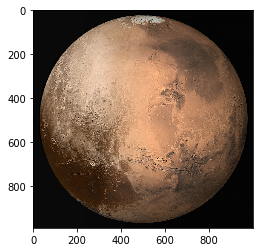

In [51]:
testImage("mars_PLUTO_5_10.jpg", resultMP)
# gaussian
# for i in range(len(lst)):
#     testImage("monalisa_laplacian_pyr_" + str(i) + ".jpg", scaler(lst[i]))

In [10]:
def multiResBlendOp2222(im1, im2, mask, levels, sigma):
    assert im1.shape == im2.shape == mask.shape

    L1 = laplacianPyrOp_3D(im1, levels, sigma)
    L2 = laplacianPyrOp_3D(im2, levels, sigma)
    LM = gaussStackOp_3D(mask, levels, sigma)
    LM1 = LM
    LM2 = (1 - LM1)

    L1_post = LM1 * L1
    L2_post = LM2 * L2
        
    for i in range(len(L1_post)):
        testImage("soccer_laplacian_pyr_" + str(i) + ".jpg", scaler(L1_post[i]))
        
    for i in range(len(L2_post)):
        testImage("volley_laplacian_pyr_" + str(i) + ".jpg", scaler(L2_post[i]))
    return

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


File saved to: output/20191218095120_soccer_laplacian_pyr_0.jpg
File saved to: output/20191218095121_soccer_laplacian_pyr_1.jpg
File saved to: output/20191218095121_soccer_laplacian_pyr_2.jpg
File saved to: output/20191218095121_soccer_laplacian_pyr_3.jpg
File saved to: output/20191218095121_soccer_laplacian_pyr_4.jpg
File saved to: output/20191218095121_soccer_laplacian_pyr_5.jpg


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


File saved to: output/20191218095121_volley_laplacian_pyr_0.jpg
File saved to: output/20191218095121_volley_laplacian_pyr_1.jpg
File saved to: output/20191218095121_volley_laplacian_pyr_2.jpg
File saved to: output/20191218095121_volley_laplacian_pyr_3.jpg
File saved to: output/20191218095121_volley_laplacian_pyr_4.jpg
File saved to: output/20191218095121_volley_laplacian_pyr_5.jpg


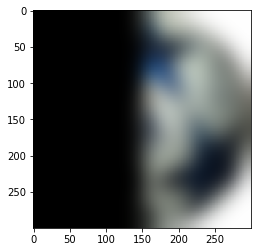

In [11]:
result = multiResBlendOp2222(imB, imS, imBSMask, SIGAMA1, SIGAMA2)